In [1]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

F:\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('Nacl_25.csv')
y=data['level']
x=data.drop(['level','breakdown voltage'],axis=1)

In [3]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: level, dtype: int64

In [4]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
x_train_reshaped = x_train.values.reshape(x_train.shape[0], x_train.shape[1],1)
x_test_reshaped = x_test.values.reshape(x_test.shape[0], x_test.shape[1],1)
#y_train_reshaped = y_train.values.reshape(y_train.shape[0], 1)
#y_test_reshaped = y_test.values.reshape(y_test.shape[0], 1)

In [6]:
x_train_reshaped.shape

(44, 20, 1)

In [7]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
r=model.fit(x_train_reshaped, y_train, epochs=200, batch_size=20, validation_split=0.6)

Epoch 1/200


1/1 [==============================] - 2s 2s/step - loss: 5.1088 - accuracy: 0.0000e+00 - val_loss: 4.9568 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 65ms/step - loss: 5.0003 - accuracy: 0.0000e+00 - val_loss: 4.8369 - val_accuracy: 0.1852
Epoch 3/200
1/1 [==============================] - 0s 62ms/step - loss: 4.8233 - accuracy: 0.1176 - val_loss: 4.7253 - val_accuracy: 0.1852
Epoch 4/200
1/1 [==============================] - 0s 62ms/step - loss: 4.7507 - accuracy: 0.1176 - val_loss: 4.6162 - val_accuracy: 0.1852
Epoch 5/200
1/1 [==============================] - 0s 53ms/step - loss: 4.5985 - accuracy: 0.1176 - val_loss: 4.5096 - val_accuracy: 0.3704
Epoch 6/200
1/1 [==============================] - 0s 55ms/step - loss: 4.5022 - accuracy: 0.2941 - val_loss: 4.4055 - val_accuracy: 0.3704
Epoch 7/200
1/1 [==============================] - 0s 64ms/step - loss: 4.4126 - accuracy: 0.2941 - val_loss: 4.3011 - val_accuracy: 0.3704
Epoch 8/

In [10]:
test_eval = model.evaluate(x_train_reshaped, y_train, verbose=1)

2/2 [==============================] - 0s 8ms/step - loss: 0.3170 - accuracy: 1.0000


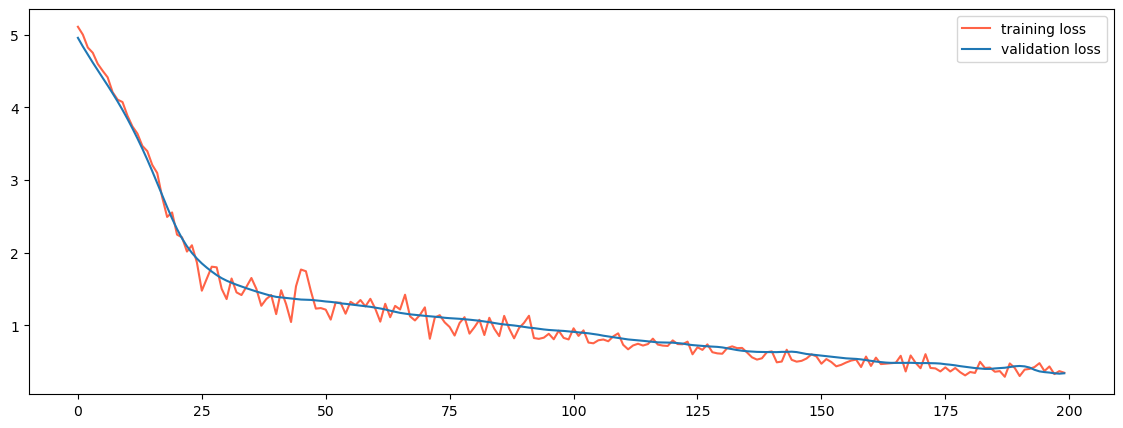

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,5)
plt.plot(r.history['loss'],label='training loss',color='tomato')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()
#plt.savefig('loss_val_vs_loss_25kV.jpg')
plt.show()

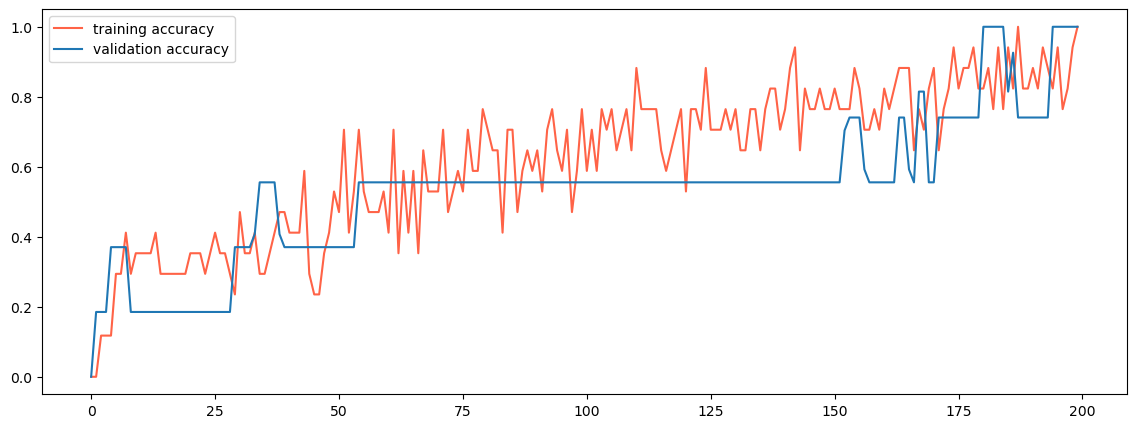

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,5)
plt.plot(r.history['accuracy'],label='training accuracy',color='tomato')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.legend()
#plt.savefig('training_acc_vs_val_acc_25kV.jpg')
plt.show()

In [13]:
gb=model.predict(x_test_reshaped)
gb.shape

1/1 [==============================] - 0s 187ms/step


(11, 128)

In [14]:
x_test_reshaped

array([[[ 1.34008302e+00],
        [-7.82282496e-01],
        [-6.96119650e-02],
        [-7.94897560e-02],
        [ 4.56087428e-01],
        [ 2.08015742e-01],
        [ 1.80513868e-01],
        [ 1.30414600e-02],
        [ 2.12236551e+00],
        [ 8.98500511e-01],
        [-1.53044373e+00],
        [-3.31717771e+00],
        [ 2.12236551e+00],
        [ 4.61369231e-01],
        [ 2.90457821e+00],
        [ 1.09166399e+00],
        [ 3.17082345e+00],
        [ 2.90457821e+00],
        [-1.39223930e+02],
        [-6.40393503e-01]],

       [[ 1.19676007e+00],
        [-7.01696141e-01],
        [-6.27283160e-02],
        [-8.00122530e-02],
        [ 4.27895561e-01],
        [ 1.83094611e-01],
        [ 2.61553878e-01],
        [ 2.23351740e-02],
        [ 1.89845621e+00],
        [ 8.02698138e-01],
        [-1.54544983e+00],
        [-3.57355039e+00],
        [ 1.89845621e+00],
        [ 4.32469019e-01],
        [ 2.76727354e+00],
        [ 1.08515233e+00],
        [ 3.00291333e+00],

In [15]:
gb

array([[3.6504762e-06, 2.7425086e-01, 7.1204289e-05, ..., 8.9906331e-07,
        1.2862665e-06, 4.3316668e-06],
       [4.0905496e-07, 7.6507229e-01, 1.2809309e-06, ..., 1.3665401e-07,
        2.0698170e-07, 5.9257468e-07],
       [3.6437477e-06, 2.7482504e-01, 7.0814182e-05, ..., 8.9799937e-07,
        1.2845179e-06, 4.3277664e-06],
       ...,
       [3.4896937e-05, 3.0795650e-03, 2.7021307e-02, ..., 1.9866124e-05,
        9.9398994e-06, 3.7012866e-05],
       [1.1002046e-09, 3.0290018e-10, 9.9624181e-01, ..., 5.2236948e-09,
        2.0772239e-09, 5.2778726e-10],
       [1.4338875e-05, 1.0924308e-03, 1.8736202e-02, ..., 6.6676234e-06,
        3.7069776e-06, 1.7207849e-05]], dtype=float32)

In [16]:
df = pd.DataFrame(gb) 
np.savetxt('t4.csv', np.transpose(df), delimiter=',', fmt='%s', encoding='utf-8')